# Name - Samarth Deshpande

# Student No - 8894058

# Practical Lab 4 - Multivariate Linear and Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.

# Import libraries

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

# Load data

In [19]:
from sklearn import datasets
diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True)

# Shape of the independent features

In [20]:
diabetes_X.shape

(442, 10)

# shape of the independent variable

In [21]:
diabetes_y.shape

(442,)

# Data Description
age = age in years
sex = gender of the person
bmi = body mass index
abp = average blood pressure
s1 = Total serum cholestrol
s2 = low density lipoproteins
s3 = high density lipoproteins
s4 = Total cholestrol/HDL
s5 = log of serum tryglyceride level
s6 = blood sugar level
dis_prog = target

In [22]:
## Creating one single dataframe for the entire dataset consisting the independent and dependent variables

In [23]:
diabetes = pd.DataFrame(diabetes_X,columns = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])
diabetes["dis_prog"] = pd.DataFrame(diabetes_y)

In [24]:
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [25]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  dis_prog  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [26]:
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,dis_prog
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


# Checking for na values

In [27]:
diabetes.isna().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
dis_prog    0
dtype: int64

# Pearsons Correlation

In [28]:
pd.DataFrame(diabetes[["dis_prog","age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"]].corr()["dis_prog"])

,dis_prog
dis_prog,1.000000
age,0.187889
sex,0.043062
bmi,0.586450
bp,0.441482
s1,0.212022
s2,0.174054
s3,-0.394789
s4,0.430453
s5,0.565883


It is found that the bmi (body mass index) has highest positive correlation on the dependent feature dis prog 
followed by s5, bp,  s4, s6, s1, age, sex. s3 shows negative correlation with dis_prog. 

# Splitting the data into Independent variable X and dependent variable y

In [29]:
X = pd.DataFrame(diabetes.iloc[:,:-1])
y = diabetes.iloc[:,-1]

# Distribution plot for dependent variable

<Axes: xlabel='dis_prog', ylabel='Density'>

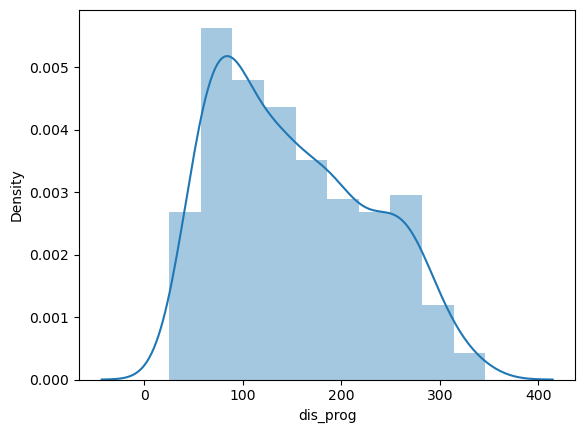

In [30]:
import warnings
warnings.filterwarnings("ignore")
sns.distplot(diabetes["dis_prog"])

# Splitting the data into train and test 

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

# Fitting the multivariate linear regression

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Number of Parameters

In [64]:
print(f'Number of parameters: {model.coef_.shape[0]}')

Number of parameters: 10


# Making predictions

In [65]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [66]:
print(X_train)

          age       sex       bmi        bp        s1        s2        s3  \
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
12   0.016281 -0.044642 -0.028840 -0.009113 -0.004321 -0.009769  0.044958   
293 -0.070900 -0.044642  0.092953  0.012680  0.020446  0.042527  0.000779   
258  0.078034  0.050680 -0.024529 -0.042406  0.006687  0.052861 -0.069172   
381 -0.070900  0.050680 -0.089197 -0.074527 -0.042848 -0.025739 -0.032356   
..        ...       ...       ...       ...       ...       ...       ...   
222 -0.023677  0.050680 -0.025607  0.042529 -0.053855 -0.047660 -0.021311   
277 -0.034575 -0.044642 -0.059019  0.001215 -0.053855 -0.078035  0.067048   
404 -0.016412 -0.044642  0.054152  0.070072 -0.033216 -0.027931  0.008142   
106 -0.096328 -0.044642 -0.076264 -0.043542 -0.045599 -0.034821  0.008142   
417 -0.052738 -0.044642  0.071397 -0.074527 -0.015328 -0.001314  0.004460   

           s4        s5        s6  
10  -0.076395 -0.062917 -0.034215  
12 

# Run a polynomial regression of the 2nd degree on the BMI 

In [68]:
from sklearn.preprocessing import PolynomialFeatures

X_train_bmi = np.array(X_train['bmi']).reshape(-1,1)
X_val_bmi = np.array(X_val['bmi']).reshape(-1,1)

In [73]:
poly = PolynomialFeatures(degree=2)
model_bmi = Model2.fit(X_train_bmi,y_train)
y_pred_bmi = model_bmi.predict(X_val_bmi)
y_pred_train_bmi = model_bmi.predict(X_train_bmi)

# Multivariate polynomial regression of the 2nd degree on all variable with bias - false

In [84]:
# Polynomial features for training set
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
Model2 = LinearRegression()
Model2.fit(X_train_poly, y_train)
X_val_poly = poly.transform(X_val)
y_pred_multi_poly = Model2.predict(X_val_poly)

# Evaluating for multivariate linear regression

 Calculating R squared, Mean absolute error and mean absolute percentage error for test set

In [108]:
r2_lin_reg = r2_score(y_test, y_test_pred)
r2_bmi_poly = r2_score(y_val, y_pred_bmi)
r2_multi_poly = r2_score(y_val, y_pred_multi_poly)

print(f"R-squared for multivariate linear Regression:{r2_score(y_test, y_test_pred)}")
print(f"R-squared for BMI Polynomial Regression:{r2_score(y_val, y_pred_bmi)}")
print(f"R-squared for Multivariate Polynomial Regression:{r2_score(y_val, y_pred_multi_poly)}")

R-squared for multivariate linear Regression:0.45058896473344867
R-squared for BMI Polynomial Regression:0.30535916600736246
R-squared for Multivariate Polynomial Regression:0.34341887247674885


Calculate MAE for each model

In [105]:
print(f"MAE for Multivariate Linear Regression:{mean_absolute_error(y_test, y_test_pred)}")
print(f"MAE for BMI Polynomial Regression:{mean_absolute_error(y_val, y_pred_bmi)}")
print(f"MAE for Multivariate Polynomial Regression:{mean_absolute_error(y_val, y_pred_multi_poly)}")

MAE for Multivariate Linear Regression:42.90759221143944
MAE for BMI Polynomial Regression:51.84516738623423
MAE for Multivariate Polynomial Regression:46.53391898986823


In [94]:
# Calculate MAPE for each model

In [95]:
print(f"MAPE for multi variate Linear regression:{mean_absolute_percentage_error(y_test, y_test_pred)}")
print(f"MAPE for BMI Polynomial Regression:{mean_absolute_percentage_error(y_val, y_pred_bmi)}")
print(f"MAPE for Multivariate Polynomial Regression:{mean_absolute_percentage_error(y_val, y_pred_multi_poly)}")

MAPE for multi variate Linear regression:0.36831789642176604
MAPE for BMI Polynomial Regression:0.38180748660063524
MAPE for Multivariate Polynomial Regression:0.3037747902339457


# Inferences 

For Multivariate Linear Regression model R2 score is highest (0.45) among other models and it is the best performing model among other. its Mean square error is also low. where as Polynomial regression has highest r2 value so it is the worst model.

# Which model would you choose for deployment, and why?

I would choose multivariate linear regression model beacause it has the highest R2 value (0.45). It suggests that it provides a better explanation for the variation in the target variable when compared to the other models.
It shows low MAE so it suggests that, on average, its predictions closely align with the actual values.